# Projeto INFNET 
## Tratamento dos dados obtidos pela API do Foursquare e clusterização
Objetivo: Analisar dentre alguns bairros de Belo Horizonte (os mais cobiçados pela população), onde seria o melhor lugar para se abrir um cassino, já que acabou de ser aprovado um projeto de lei que legaliza esse tipo de atividade no Brasil.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
import folium

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [2]:
# Carregando o dataset do drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Datasets/'
file_name = 'venues_bh_cat_casino.csv'

df = pd.read_csv(path + file_name)

Mounted at /content/drive


In [3]:
dados = pd.DataFrame(
        [('Anchieta', -19.949453323219245, -43.92700801773141),
         ('Belvedere', -19.972559218057427, -43.93718789026611), 
         ('Centro', -19.919279099643592, -43.939315609652134),
         ('Cidade Jardim', -19.938641684001976, -43.950640230590984),
         ('Cidade Nova', -19.890068184185246, -43.924772018135),
         ('Castelo', -19.88213333487584, -43.999206085545126), 
         ('Gutierrez', -19.93678462997389, -43.95771548553014), 
         ('Buritis', -19.97563516763052, -43.96828714846663),
         ('Prado', -19.922907168023617, -43.960709744404966), 
         ('Lourdes', -19.93049620714053, -43.94296904336832), 
         ('Vila da Serra', -19.9546793, -43.9154242), 
         ('Floresta', -19.916406188338616, -43.92885909887027),
         ('Funcionários', -19.931827768132536, -43.92856347797582),
         ('Ouro Preto', -19.8736478717947, -43.98513618425674), 
         ('Santa Tereza', -19.91578247666307, -43.91675236069356), 
         ('Savassi', -19.93614741061873, -43.93349802745276),
         ('Santo Antônio', -19.94462581113818, -43.94392639104507),
         ('Santo Agostinho', -19.92917086904201, -43.95068392066596), 
         ('Santa Efigênia', -19.923409948392948, -43.92061174310462), 
         ('Sion', -19.953112178597326, -43.934422374007475)], columns=['Bairro', 'Lat', 'Lng'])

In [4]:
df.head()

,Unnamed: 0,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address_extended,geocodes.roof.latitude,geocodes.roof.longitude,related_places.children,related_places.parent.fsq_id,related_places.parent.name,Bairro,Cat1,Cat2,Cat3
0,0,50209ad729a6d2dc98e8f581,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],195,/v3/places/50209ad729a6d2dc98e8f581,MIXING BAR - Premium Cocktails para Festas e E...,America/Sao_Paulo,-19.951138,-43.926094,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Arts and Entertainment,Cocktail Bar,Buffet
1,1,542834a9498e550c059f6645,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",[],264,/v3/places/542834a9498e550c059f6645,Bitaca Capetinga,America/Sao_Paulo,-19.948374,-43.929148,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Beer Bar,Gastropub,NaN
2,2,536fa19a498ed80da22f94e0,"[{'id': 19014, 'name': 'Hotel', 'icon': {'pref...",[],794,/v3/places/536fa19a498ed80da22f94e0,e.Suítes Sion,America/Sao_Paulo,-19.955172,-43.931309,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Hotel,NaN,NaN
3,3,53e2a66a498e415d67821083,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",[],539,/v3/places/53e2a66a498e415d67821083,Gilboa,America/Sao_Paulo,-19.946521,-43.931162,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Pub,NaN,NaN
4,4,526ae03e498e1e2092261522,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],781,/v3/places/526ae03e498e1e2092261522,Jângal,America/Sao_Paulo,-19.942619,-43.929383,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Arts and Entertainment,Pub,Restaurant


## Vizualização dos dados
Mapa com marcação dos bairros usados e todos os locais próximos que foram econtrados

In [5]:
def plotMap(lat, lng, label, map, color, radius):
  for lat, lng, label in zip(lat, lng, label):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=radius,
        color=color,
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map)

  return map

In [ ]:
bh_map = folium.Map(location=[-19.9494271, -43.9269861],tiles='OpenStreetMap',  zoom_start=12)

plotMap(dados['Lat'], dados['Lng'], dados['Bairro'], map=bh_map, color='blue', radius=5)

In [134]:
plotMap(dados['Lat'], dados['Lng'], dados['Bairro'], map=bh_map, color='blue', radius=5)
plotMap(df['geocodes.main.latitude'], df['geocodes.main.longitude'], df['name'], map=bh_map, color='#ff6e6e', radius=1.5)

## Feature Engineering
Vamos transformar todas as categorias em apenas 4: Hoteis, Bares, Boates e Restaurantes

In [135]:
restaurant = ['American Restaurant', 'BBQ Joint', 'Bed and Breakfast', 'Brazilian Restaurant', 'Buffet', 'Burger Joint', 'Cafes, Coffee, and Tea Houses', 'Café', 'Churrascaria', 'Diner', 
               'Fast Food Restaurant', 'Fish and Chips Shop', 'Mineiro Restaurant',  'Pizzeria', 'Restaurant', 'Seafood Restaurant', 'Steakhouse', 'Vegan and Vegetarian Restaurant']

bar = ['Bar', 'Beer Bar', 'Beer Garden', 'Brewery', 'Cocktail Bar', 'Dive Bar','Gastropub', 'Gay Bar', 'Pub', 'Sports Bar', 'Arts and Entertainment']

night_club = ['Concert Hall', 'Lounge', 'Night Club', 'Rock Club', 'Strip Club']

hotel = ['Cottage / Cabin', 'Hostel', 'Hotel', 'Inn', 'Lodge', 'Motel']


cats = {'restaurant': restaurant, 'bar': bar, 'nightclub': night_club, 'hotel': hotel}

In [136]:
df.head(3)

,Unnamed: 0,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address_extended,geocodes.roof.latitude,geocodes.roof.longitude,related_places.children,related_places.parent.fsq_id,related_places.parent.name,Bairro,Cat1,Cat2,Cat3
0,0,50209ad729a6d2dc98e8f581,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],195,/v3/places/50209ad729a6d2dc98e8f581,MIXING BAR - Premium Cocktails para Festas e E...,America/Sao_Paulo,-19.951138,-43.926094,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Arts and Entertainment,Cocktail Bar,Buffet
1,1,542834a9498e550c059f6645,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",[],264,/v3/places/542834a9498e550c059f6645,Bitaca Capetinga,America/Sao_Paulo,-19.948374,-43.929148,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Beer Bar,Gastropub,NaN
2,2,536fa19a498ed80da22f94e0,"[{'id': 19014, 'name': 'Hotel', 'icon': {'pref...",[],794,/v3/places/536fa19a498ed80da22f94e0,e.Suítes Sion,America/Sao_Paulo,-19.955172,-43.931309,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchieta,Hotel,NaN,NaN


In [10]:
categories = [] 
for col in ['Cat1', 'Cat2', 'Cat3']:
  var=[]
  for row in df[col]:
    if pd.isnull(row):
      var.append(row)
    else:
      for k, v in cats.items():
        if row in v:
          var.append(k)

  categories.append(var)

In [63]:
df_categ = pd.DataFrame(data=categories, index=['gcat_1', 'gcat_2', 'gcat_3']).T

In [64]:
df_categ

,gcat_1,gcat_2,gcat_3
0,bar,bar,restaurant
1,bar,bar,NaN
2,hotel,NaN,NaN
3,bar,NaN,NaN
4,bar,bar,restaurant
...,...,...,...
459,bar,NaN,NaN
460,nightclub,NaN,NaN
461,hotel,hotel,NaN
462,hotel,hotel,NaN


Vamos retirar os valores duplicados (como por exemplo o 1º e o 2º registro possuem 'bar' 2x) e vamos manter apenas uma.

In [65]:
for index, row in df_categ.iterrows():
  test = []
  for val in row:
    test.append(val)
  if test[0] == test[1]:
    row[1] = None
  elif test[0] == test[2]:
    row[2] == None
  elif test[1] == test[2]:
    row[2] == None
  
df_categ.head(3)

,gcat_1,gcat_2,gcat_3
0,bar,None,restaurant
1,bar,None,NaN
2,hotel,NaN,NaN


Vamos criar 4 colunas, uma para cada categoria, e colocar o valor 1 nas colunas que categorizam o local (dummy)

In [66]:
df_categ['bar'] = np.nan
df_categ['hotel'] = np.nan
df_categ['restaurant'] = np.nan
df_categ['nightclub'] = np.nan

for idx, row in df_categ.iterrows():
  for c in range(3):
    for v in ['bar', 'hotel', 'restaurant', 'nightclub']:
      if row[c] == v:
        df_categ[v].iloc[idx] = 1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [147]:
new_df = pd.concat([df[['name', 'Bairro', 'geocodes.main.latitude', 'geocodes.main.longitude']], df_categ[['bar','hotel', 'restaurant', 'nightclub']]], axis=1).fillna(0)
new_df.tail()

,name,Bairro,geocodes.main.latitude,geocodes.main.longitude,bar,hotel,restaurant,nightclub
459,Growler Station Wals,Sion,-19.954426,-43.940194,1.0,0.0,0.0,0.0
460,DJ Babi,Sion,-19.957421,-43.940044,0.0,0.0,0.0,1.0
461,Hotel Rural Canto das Cachoeiras Ltda,Sion,-19.953583,-43.939009,0.0,1.0,0.0,0.0
462,Apartamento do Escultor,Sion,-19.956793,-43.937526,0.0,1.0,0.0,0.0
463,Pousada Vila do Beco,Sion,-19.946842,-43.940655,0.0,1.0,0.0,0.0


In [148]:
new_df[new_df['nightclub'] == 1].tail()

,name,Bairro,geocodes.main.latitude,geocodes.main.longitude,bar,hotel,restaurant,nightclub
449,MBL Comercial Ltda,Santa Efigênia,-19.924861,-43.923152,0.0,0.0,0.0,1.0
450,Tulipão,Santa Efigênia,-19.924892,-43.923215,1.0,0.0,1.0,1.0
454,Show Time,Santa Efigênia,-19.928234,-43.920550,1.0,0.0,0.0,1.0
457,Lopes e Vieira Comercial Ltda,Santa Efigênia,-19.931462,-43.924247,0.0,0.0,0.0,1.0
460,DJ Babi,Sion,-19.957421,-43.940044,0.0,0.0,0.0,1.0


Observação: Como o Foursquare é um app que a base de dados é criada pelos próprios usuários, podem haver alguns erros. No output a cima é possível ver 2 lojas classificadas como 'boate', mas que parecem ser lojas comuns (MBL Comercial e Lopes e Vieira).<br> Seria impossível conferir as 464 linhas do dataframe e retirar os locais errados, então nada será tirado.<br><br>

In [157]:
# Criando um novo dataframe agrupado pelos bairros
bairros_dummy = new_df.groupby(['Bairro'])['bar', 'restaurant', 'hotel', 'nightclub'].sum()
bairros_dummy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,bar,restaurant,hotel,nightclub
Bairro,,,,
Anchieta,26.0,7.0,13.0,5.0
Belvedere,9.0,4.0,6.0,4.0
Buritis,13.0,9.0,1.0,3.0
Castelo,10.0,3.0,3.0,0.0
Centro,15.0,6.0,33.0,3.0
Cidade Jardim,17.0,6.0,22.0,10.0
Cidade Nova,10.0,1.0,5.0,2.0
Floresta,16.0,8.0,18.0,13.0
Funcionários,22.0,10.0,15.0,10.0


Vamos criar uma máscara para plotar o gráfico na ordem que queremos (decrescente)

In [150]:
mask = bairros_dummy.sum(axis=1).sort_values().index

Plotando o gráfico dos bairros e os estabelecimentos próximos

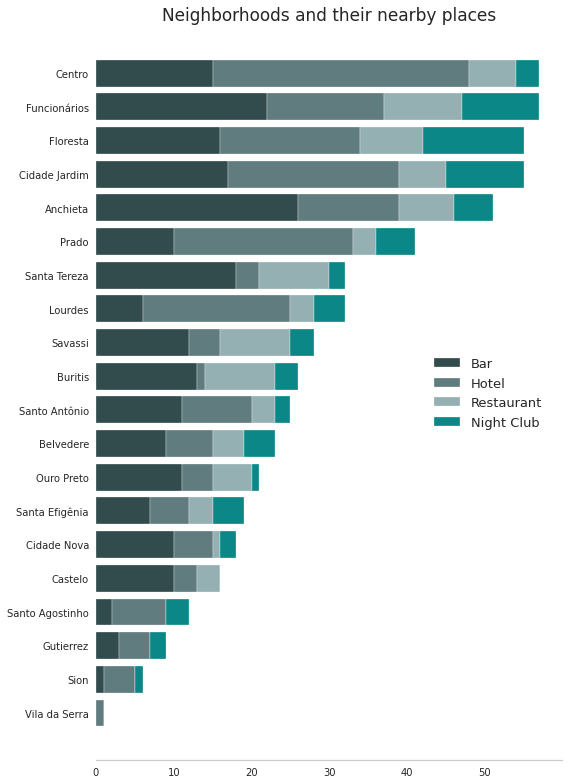

In [73]:
labels = mask
bares = bairros_dummy['bar']
restaurants = bairros_dummy['restaurant']
hotels = bairros_dummy['hotel']
nightclubs = bairros_dummy['nightclub']
width=0.5

# fig, ax = plt.subplots()
sns.set_style('whitegrid')
plt.figure(figsize=(8, 11))
plt.barh(labels, bares[mask], color='#324b4d', label='Bar')
plt.barh(labels, hotels[mask], color='#617c7e', left=bares[mask], label='Hotel')
plt.barh(labels, restaurants[mask], color='#94b0b2', left=bares[mask]+hotels[mask], label='Restaurant')
plt.barh(labels, nightclubs[mask], color='#0c8787', left=bares[mask]+hotels[mask]+restaurants[mask], label='Night Club')
plt.title('Neighborhoods and their nearby places', {'fontsize': 17})
plt.legend(borderpad=1, prop={'size': 13}, loc='center right')
plt.grid(False)
sns.despine(left=True)
plt.tight_layout()


## Clusterização
### Determinando valor de k

Método do cotovelo:

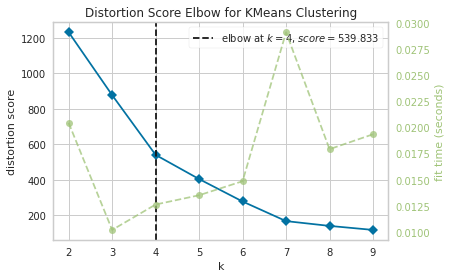

In [20]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2, 10))
yellow_visualizer.fit(bairros_dummy)
yellow_visualizer.show()

Método da silhueta:

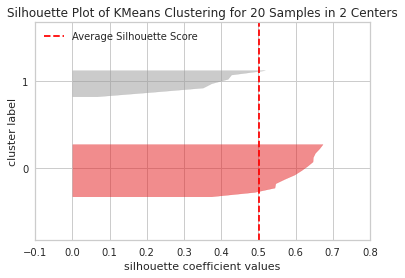

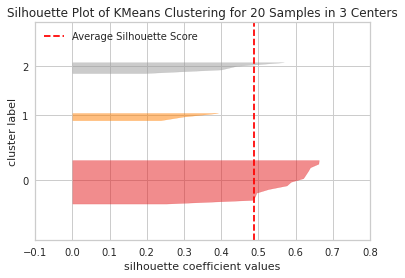

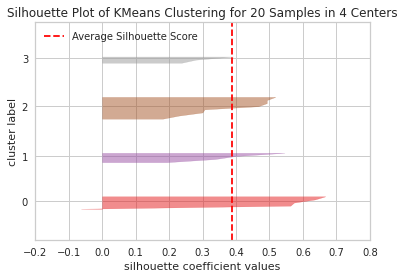

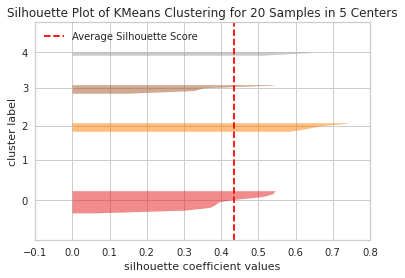

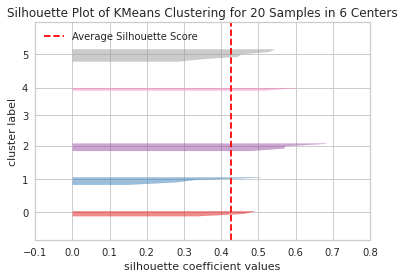

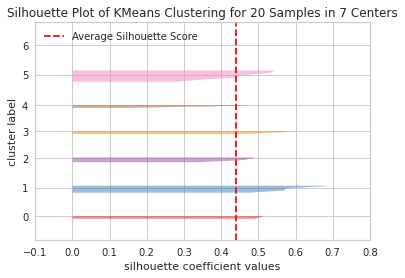

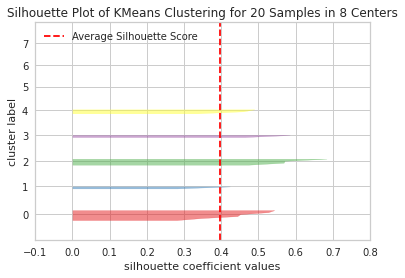

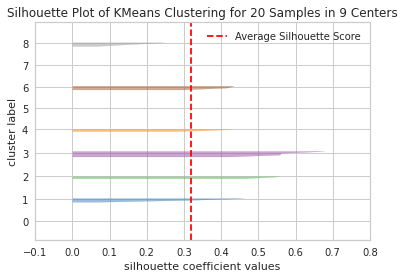

In [21]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(bairros_dummy)
  yellow_visualizer.show()

### Aplicando KMeans com k=5 e vamos considerar o cluster 1 como outlier

In [158]:
k_means = KMeans(n_clusters=5)
k_means.fit(bairros_dummy)

KMeans(n_clusters=5)

In [159]:
bairros_dummy['Cluster'] = k_means.labels_

In [170]:
bairros_dummy.reset_index(inplace=True)
bairros_dummy.head()

,Bairro,bar,restaurant,hotel,nightclub,Cluster
0,Anchieta,26.0,7.0,13.0,5.0,1
1,Belvedere,9.0,4.0,6.0,4.0,0
2,Buritis,13.0,9.0,1.0,3.0,0
3,Castelo,10.0,3.0,3.0,0.0,0
4,Centro,15.0,6.0,33.0,3.0,4


In [162]:
bairros_dummy.groupby('Cluster').sum()

,bar,restaurant,hotel,nightclub
Cluster,,,,
0,101.0,46.0,40.0,21.0
1,81.0,31.0,68.0,38.0
2,6.0,0.0,16.0,6.0
3,16.0,6.0,42.0,9.0
4,15.0,6.0,33.0,3.0


In [164]:
bairros_dummy.groupby('Cluster').mean()

,bar,restaurant,hotel,nightclub
Cluster,,,,
0,11.222222,5.111111,4.444444,2.333333
1,20.250000,7.750000,17.000000,9.500000
2,1.500000,0.000000,4.000000,1.500000
3,8.000000,3.000000,21.000000,4.500000
4,15.000000,6.000000,33.000000,3.000000


Vemos que os clusters 0 e 1 se destacam sendo o cluster 1 com uma média de estabelecimentos bem alta.<br> Vamos ver como estão esses 2 clusters no mapa

In [171]:
# Colocando os cluster em um dataframe que tenha latitude e longitude
new_df = new_df.merge(bairros_dummy[['Bairro', 'Cluster']], on='Bairro', how='left')
new_df

,name,Bairro,geocodes.main.latitude,geocodes.main.longitude,bar,hotel,restaurant,nightclub,Cluster
0,MIXING BAR - Premium Cocktails para Festas e E...,Anchieta,-19.951138,-43.926094,1.0,0.0,1.0,0.0,1
1,Bitaca Capetinga,Anchieta,-19.948374,-43.929148,1.0,0.0,0.0,0.0,1
2,e.Suítes Sion,Anchieta,-19.955172,-43.931309,0.0,1.0,0.0,0.0,1
3,Gilboa,Anchieta,-19.946521,-43.931162,1.0,0.0,0.0,0.0,1
4,Jângal,Anchieta,-19.942619,-43.929383,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
459,Growler Station Wals,Sion,-19.954426,-43.940194,1.0,0.0,0.0,0.0,2
460,DJ Babi,Sion,-19.957421,-43.940044,0.0,0.0,0.0,1.0,2
461,Hotel Rural Canto das Cachoeiras Ltda,Sion,-19.953583,-43.939009,0.0,1.0,0.0,0.0,2
462,Apartamento do Escultor,Sion,-19.956793,-43.937526,0.0,1.0,0.0,0.0,2


In [174]:
bh_map = folium.Map(location=[-19.9494271, -43.9269861],tiles='OpenStreetMap',  zoom_start=12) # Criando o mapa

# plotMap(dados['Lat'], dados['Lng'], dados['Bairro'], map=bh_map, color='blue', radius=5) # Marcando o centróide dos bairros nos mapas

colors = ['#7b7676', '#ff6e6e', '#7b7676', '#7b7676', '#7b7676']

# Marcando os locais encontrados e destacando em vermelho o cluster mais atrativo para abrir um cassino
for c in range(5):
  data_v = new_df[new_df['Cluster'] == c].reset_index()
  for lat, lng, label in zip(data_v['geocodes.main.latitude'], data_v['geocodes.main.longitude'], data_v['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color=colors[c],
        fill=True,
        fill_opacity=0.1,
        parse_html=False).add_to(bh_map)

bh_map

In [172]:

bh_map = folium.Map(location=[-19.9494271, -43.9269861],tiles='OpenStreetMap',  zoom_start=12) # Criando o mapa

# plotMap(dados['Lat'], dados['Lng'], dados['Bairro'], map=bh_map, color='blue', radius=5) # Marcando o centróide dos bairros nos mapas

colors = ['#b64ab7', '#7b7676', '#7b7676', '#7b7676', '#7b7676']

# Marcando os locais encontrados e destacando em vermelho o cluster mais atrativo para abrir um cassino
for c in range(5):
  data_v = new_df[new_df['Cluster'] == c].reset_index()
  for lat, lng, label in zip(data_v['geocodes.main.latitude'], data_v['geocodes.main.longitude'], data_v['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color=colors[c],
        fill=True,
        fill_opacity=0.1,
        parse_html=False).add_to(bh_map)

bh_map

# Conclusão

Temos 2 clusters que mostraram ter uma boa vida noturna e hotéis nas proximidades, foram eles:
* Cluster 1: Anchieta, Cidade Jardim, Floresta, Funcionários 
* Cluster 2: Buritis, Castelo, Cidade Nova, Ouro Preto, Santa Efigênia, Santa Tereza, Santo Antônio, Savassi

Como o <strong>Cluster 1</strong> tem uma média muito alta e é composto por bairros bem próximos, <strong>foi decidido que naquela região seria o melhor local para se abrir um cassino em Belo Horizonte</strong>. Além disso, o Cluster 2 possui alguns bairros que estão próximos do Cluster 1, assim como o Centro (nosso outlier, mas que possui um número bem altos de estabelecimentos perto), o que ainda contribuiria no elevado movimento do local/região.
<br>